In [1]:
import numpy as np

In [2]:
ls ~cpedersen/Codes/Wavelets/sparse/

test_load_pickle.py  training.p  valid.p


In [4]:
import os
import pickle

In [5]:
folder = os.path.expanduser("~cpedersen/Codes/Wavelets/sparse/")
with open(os.path.join(folder, "training.p"), 'rb') as handle:
    fields,values,preds = pickle.load(handle)
with open(os.path.join(folder, "valid.p"), 'rb') as handle:
    fields_valid,values_valid,preds_valid = pickle.load(handle)


In [6]:
fields.shape

(900, 73)

In [7]:
import matplotlib.pyplot as plt

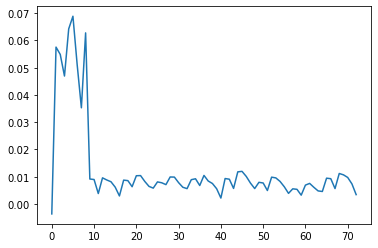

In [8]:
plt.plot(fields.mean(0))

In [26]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import r2_score

In [81]:
alphas = np.logspace(-7, -1, 1000)

In [82]:
X.shape

(900, 73)

In [83]:
X = fields
y = values[:, 0]

rng = np.random.RandomState(0)
p = rng.permutation(len(X))
train_size = 800
Xtrain = X[p[:train_size]]
ytrain = y[p[:train_size]]

Xtest = X[p[train_size:]]
ytest = y[p[train_size:]]

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [85]:
coefs = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(X, y)
    coefs.append(lasso.coef_)
    print(".", end='')

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [86]:
coefs = np.array(coefs)

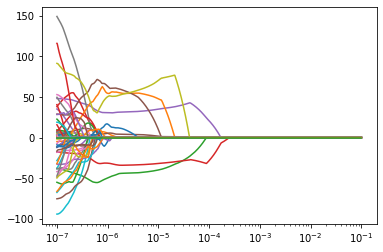

In [87]:
plt.plot(alphas, coefs)
plt.xscale('log')

In [88]:
coefs_train = []
y_pred_train = []
y_pred_test = []
r2_train = []
r2_test = []
for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=True)
    lasso.fit(Xtrain, ytrain)
    coefs_train.append(lasso.coef_)
    print(".", end='')
    
    y_pred_train.append(lasso.predict(Xtrain))
    y_pred_test.append(lasso.predict(Xtest))
    r2_train.append(r2_score(ytrain, y_pred_train[-1]))
    r2_test.append(r2_score(ytest, y_pred_test[-1]))

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [89]:
y_pred_test[-1].shape

(100,)

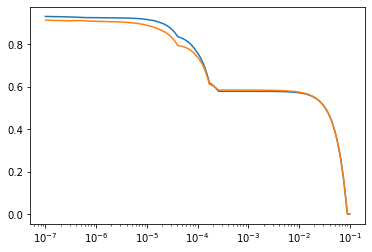

In [90]:
plt.plot(alphas, r2_train)
plt.plot(alphas, r2_test)
plt.xscale('log')

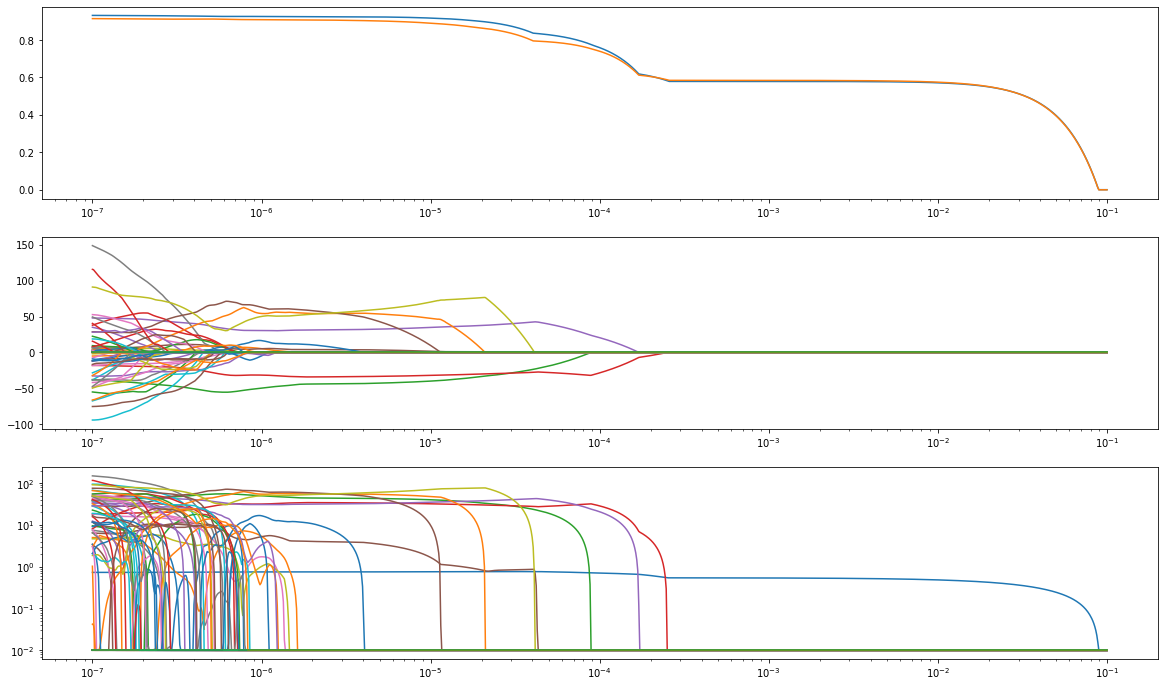

In [91]:
fig, axs = plt.subplots(3, 1, figsize=(20, 12))
axs[0].plot(alphas, r2_train)
axs[0].plot(alphas, r2_test)
axs[0].set_xscale('log')

axs[1].plot(alphas, coefs)
axs[1].set_xscale('log')

axs[2].plot(alphas, np.abs(coefs) + 1e-2)
axs[2].set_xscale('log')
axs[2].set_yscale('log')


In [92]:
from scipy.interpolate import interp1d

In [93]:
coef_interp = interp1d(alphas, coefs, axis=0)

In [94]:
alphas.shape, coefs.shape

((1000,), (1000, 73))

In [95]:
coef_interp(1e-3)

array([0.52687543, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [96]:
coef_interp(1e-5)

array([  0.74523606,   0.        , -39.9356849 , -31.95749724,
        34.94430899,   1.65459903,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  47.64913214,   0.        ,   0.        ,
         0.        ,   9.75790491,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  

In [97]:
alphas = np.logspace(-7, -1, 100)

In [108]:
all_coefs_train = []
all_y_pred_train = []
all_y_pred_test = []
all_r2_train = []
all_r2_test = []



for i in range(50):
    rng = np.random.RandomState(i)
    p = rng.permutation(len(X))
    train_size = 800
    Xtrain = X[p[:train_size]]
    ytrain = y[p[:train_size]]

    Xtest = X[p[train_size:]]
    ytest = y[p[train_size:]]
    
    coefs_train = []
    y_pred_train = []
    y_pred_test = []
    r2_train = []
    r2_test = []
    all_coefs_train.append(coefs_train)
    all_y_pred_train.append(y_pred_train)
    all_y_pred_test.append(y_pred_test)
    all_r2_train.append(r2_train)
    all_r2_test.append(r2_test)
    print(i, end=":")
    for alpha in alphas:
        lasso = Lasso(alpha=alpha, fit_intercept=True)
        lasso.fit(Xtrain, ytrain)
        coefs_train.append(lasso.coef_)
        print(".", end='')

        y_pred_train.append(lasso.predict(Xtrain))
        y_pred_test.append(lasso.predict(Xtest))
        r2_train.append(r2_score(ytrain, y_pred_train[-1]))
        r2_test.append(r2_score(ytest, y_pred_test[-1]))

    print()
all_coefs_train = np.array(all_coefs_train)
all_y_pred_train = np.array(all_y_pred_train)
all_y_pred_test = np.array(all_y_pred_test)
all_r2_train = np.array(all_r2_train)
all_r2_test = np.array(all_r2_test)


0:....................................................................................................
1:....................................................................................................
2:....................................................................................................
3:....................................................................................................
4:....................................................................................................
5:....................................................................................................
6:....................................................................................................
7:....................................................................................................
8:....................................................................................................
9:.......................................................................

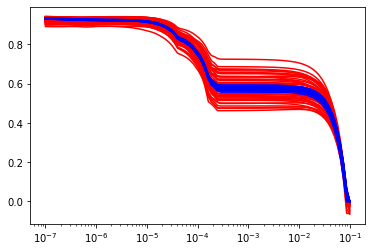

In [109]:
plt.plot(alphas, all_r2_test.T, 'r')
plt.plot(alphas, all_r2_train.T, 'b')
plt.xscale('log')

In [110]:
all_coefs_train.shape

(50, 100, 73)

In [111]:
all_coef_interp = interp1d(alphas, np.rollaxis(all_coefs_train, 1), axis=0)

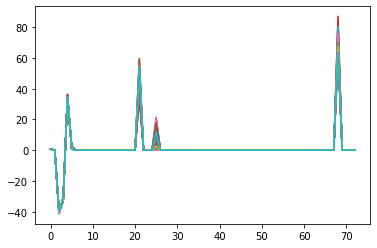

In [112]:
plt.plot(all_coef_interp(1e-5).T)

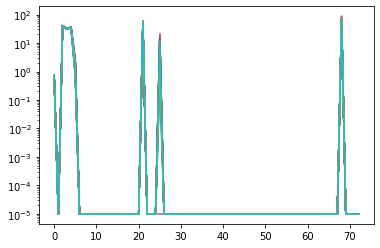

In [113]:
plt.plot(np.abs(all_coef_interp(1e-5).T) + 1e-5)
plt.yscale('log')

In [116]:
preds.shape

(900, 6)

In [118]:
r2_score(y, preds[:, 0])

0.9198968509664975

In [128]:
all_r2_train.mean(0)[31]

0.9196018206278211

In [129]:
alphas[31]

7.564633275546291e-06

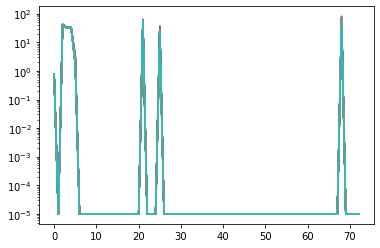

In [130]:
plt.plot(np.abs(all_coef_interp(alphas[31]).T) + 1e-5)
plt.yscale('log')

In [131]:
all_coef_interp(alphas[31]).mean(0)

array([  0.74378661,   0.        , -41.32375344, -32.66629705,
        33.80510958,   2.5572005 ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,  49.3465123 ,   0.        ,   0.        ,
         0.        ,  26.58743191,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.        ,
         0.        ,   0.        ,   0.        ,   0.  